# Data Analysis and Visualization

## 1. Importing Libraries
We'll use `pandas`, `numpy`, `seaborn`, and `matplotlib` for data manipulation and visualization.

In [9]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)
    

## 2. Loading the Dataset
The Titanic dataset is loaded from a local CSV file.

In [10]:

# Load dataset
df = pd.read_csv('./titanic.csv')
print(df.head())
    

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


## 3. Data Cleaning
This step includes handling missing values, removing duplicates, treating outliers, and standardizing categorical values.

In [11]:

# Handling missing values
df.fillna(df.mean(numeric_only=True), inplace=True)
df.fillna('Unknown', inplace=True)

# Removing duplicates
df.drop_duplicates(inplace=True)

# Handling outliers using IQR
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    df = df[(df[col] >= Q1 - 1.5 * IQR) & (df[col] <= Q3 + 1.5 * IQR)]

# Standardizing categorical values
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].str.strip().str.lower()
    

## 4. Exploratory Data Analysis (EDA)
Visualizing and analyzing the data using univariate, bivariate, and multivariate techniques.

         survived      pclass         age       sibsp  parch        fare
count  474.000000  474.000000  474.000000  474.000000  474.0  474.000000
mean     0.314346    2.453586   30.215666    0.210970    0.0   14.782788
std      0.464745    0.757596    9.550058    0.461872    0.0   11.202694
min      0.000000    1.000000    5.000000    0.000000    0.0    0.000000
25%      0.000000    2.000000   24.000000    0.000000    0.0    7.789575
50%      0.000000    3.000000   29.699118    0.000000    0.0    9.500000
75%      1.000000    3.000000   35.000000    0.000000    0.0   17.700000
max      1.000000    3.000000   57.000000    2.000000    0.0   53.100000


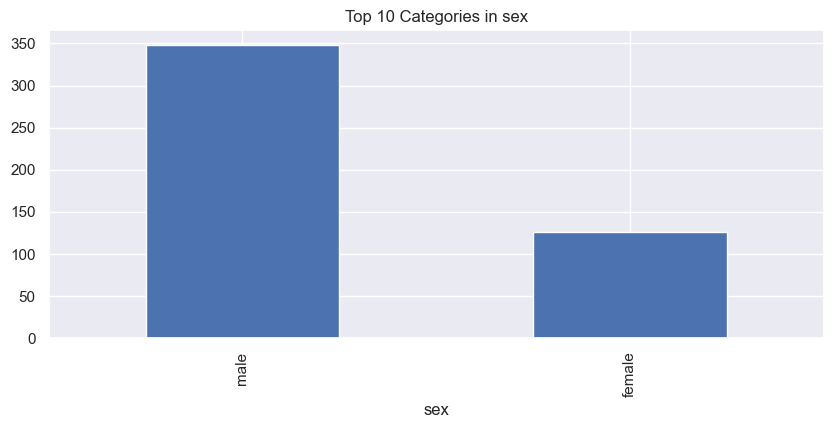

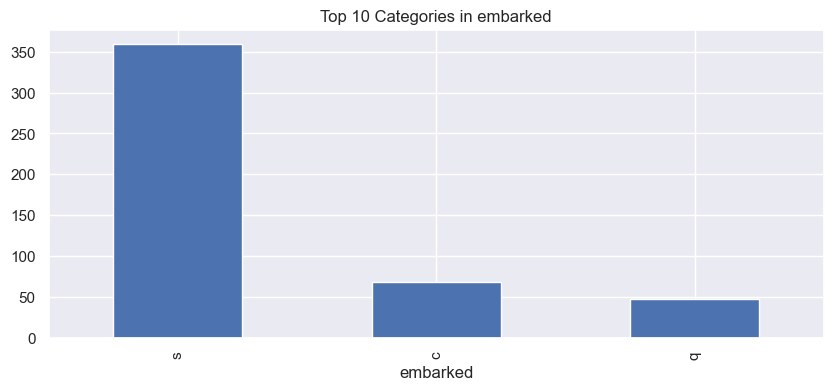

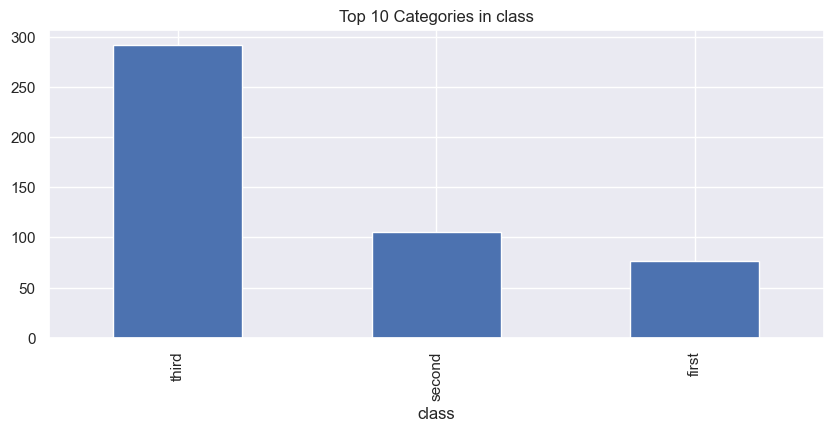

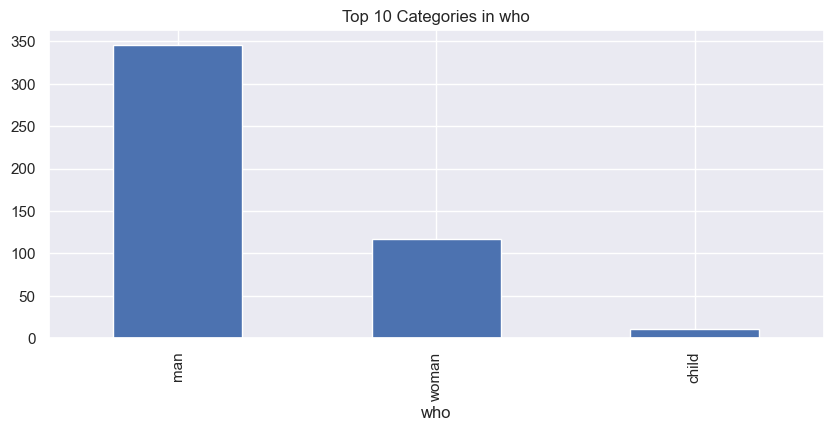

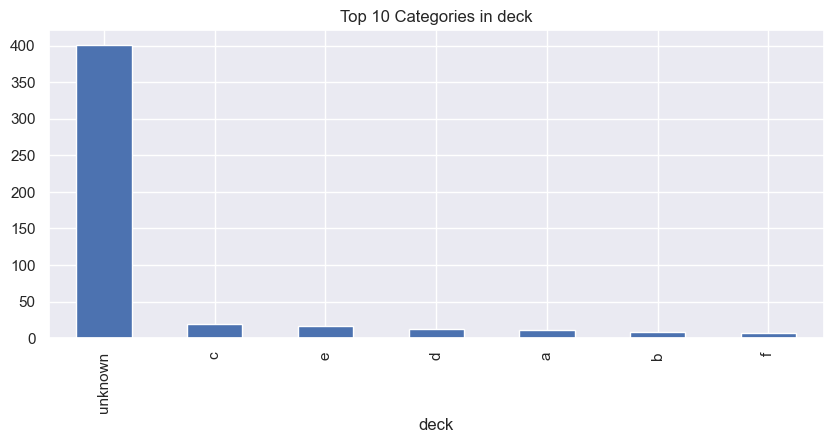

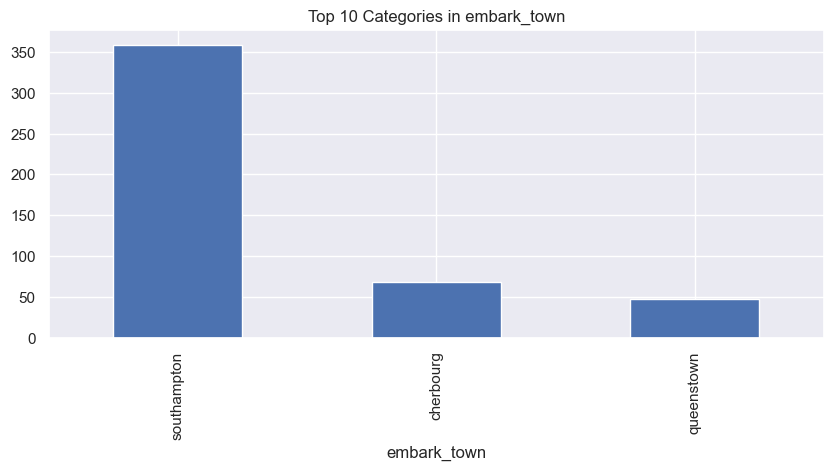

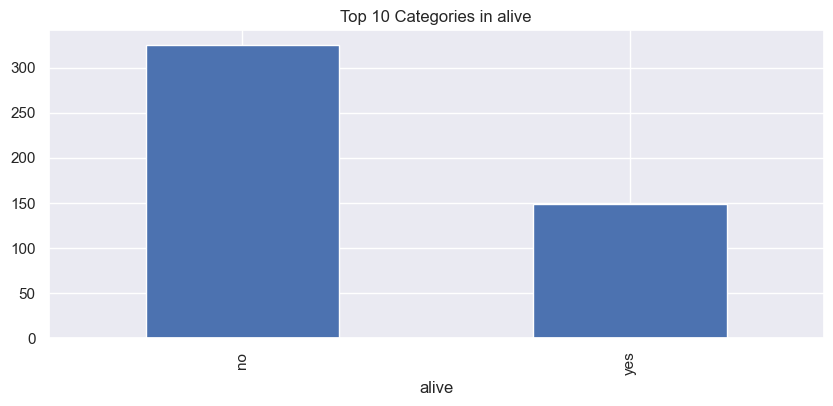

In [12]:

# Univariate Analysis
print(df.describe())
for col in df.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(10,4))
    df[col].value_counts().head(10).plot(kind='bar')
    plt.title(f'Top 10 Categories in {col}')
    plt.show()
    

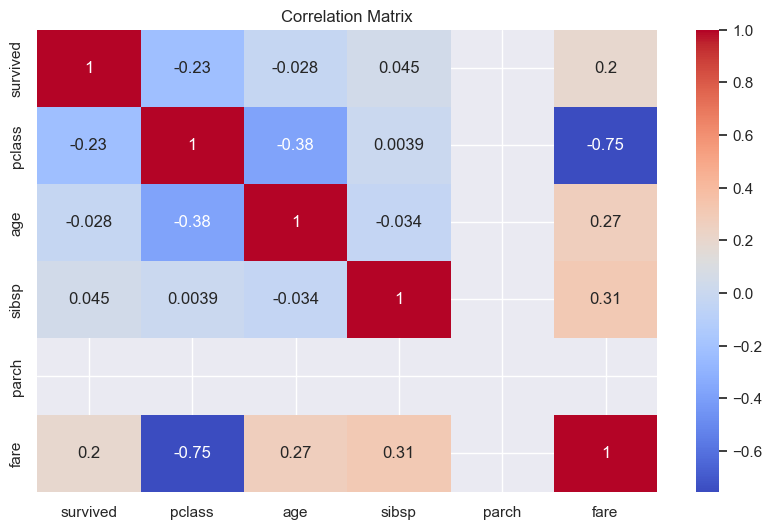

In [13]:

# Bivariate Analysis
plt.figure(figsize=(10,6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
    

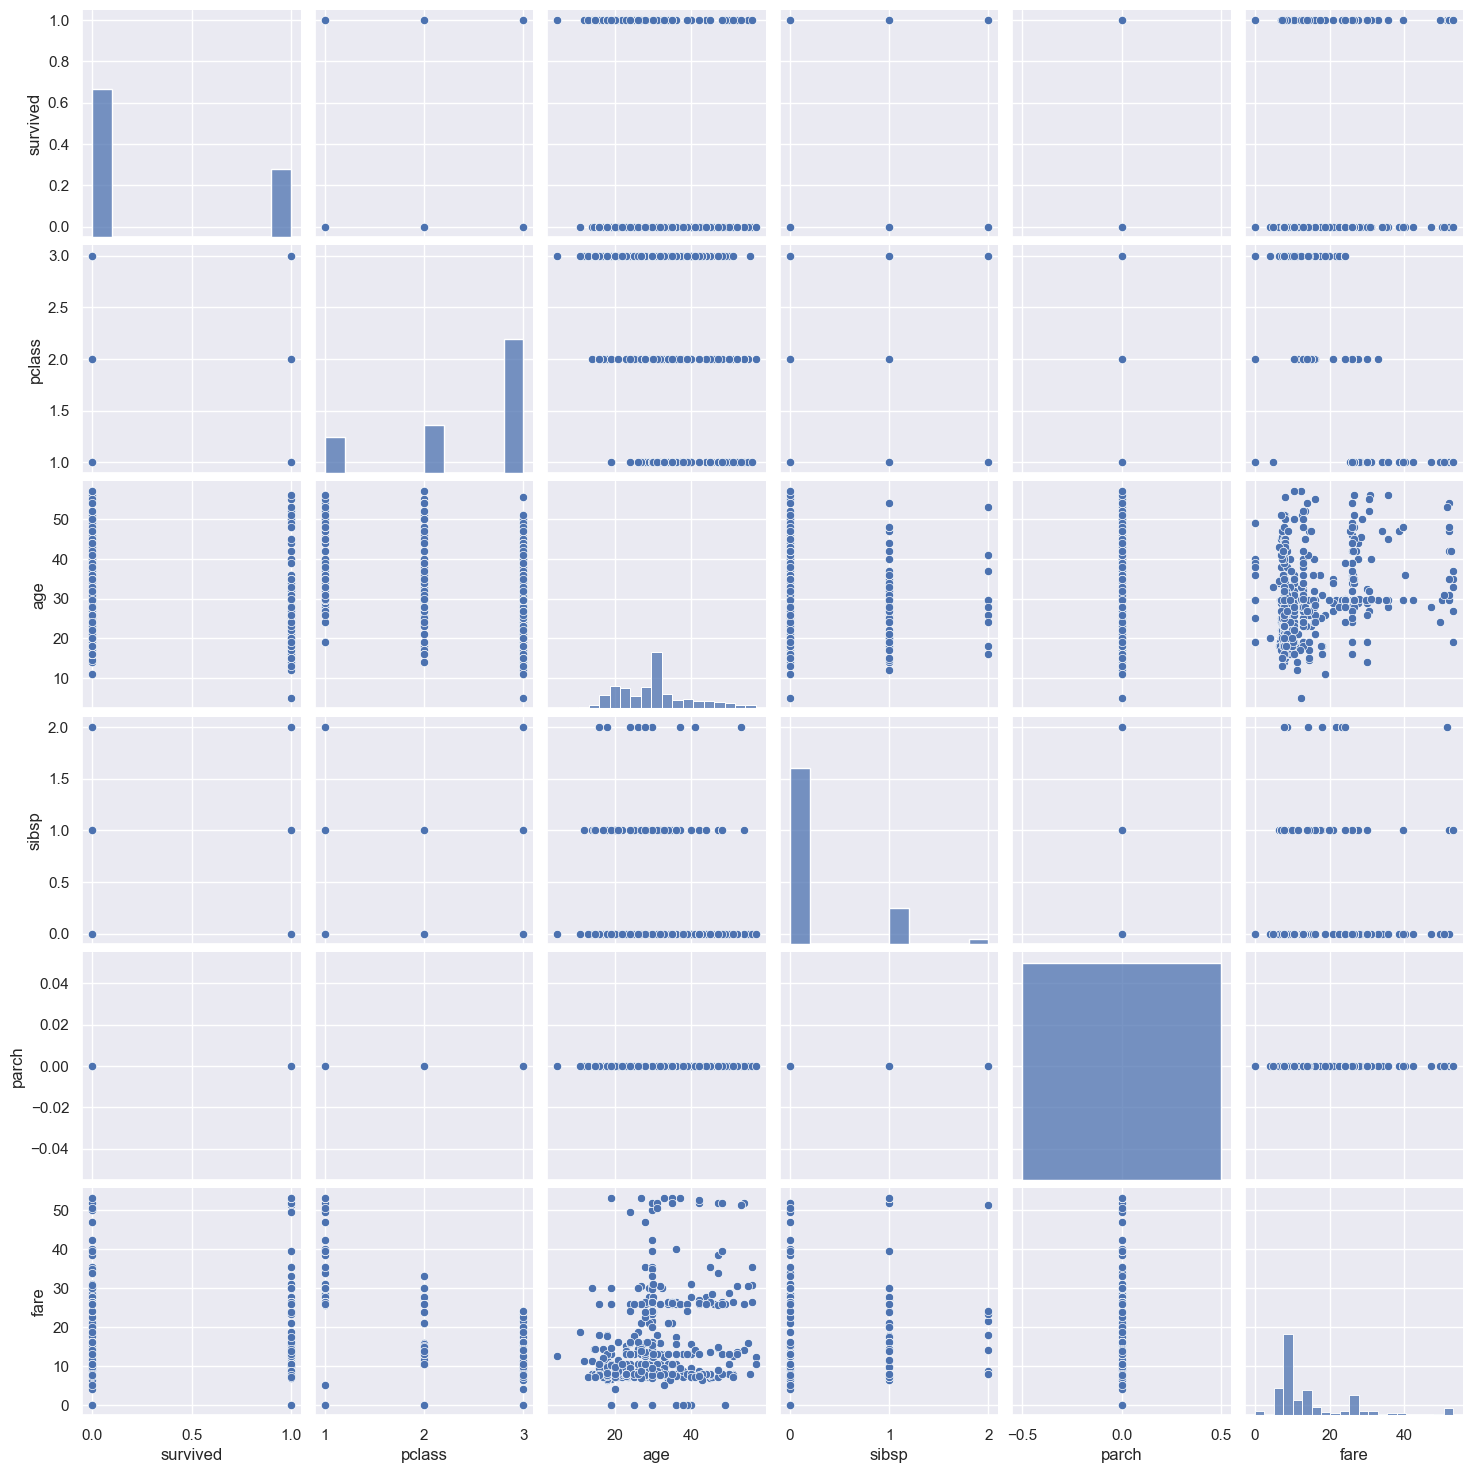

In [14]:

# Multivariate Analysis
sns.pairplot(df[numerical_cols])
plt.show()
    

## 5. Saving the Cleaned Data
The cleaned dataset is saved to a CSV file for future use.

In [15]:

# Save cleaned data
df.to_csv('cleaned_dataset.csv', index=False)
    

## Conclusion
The dataset has been cleaned and analyzed, providing insights into relationships between variables in the Titanic dataset.